In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading in data
vid_df = pd.read_csv('/Users/magnus/Desktop/programming/PROJECTS/VideoGame sales/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [5]:
vid_df.shape

(16719, 16)

In [7]:
vid_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#finding out null values
vid_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [11]:
#Dropping columns with excessive null values
vid_df = vid_df.drop(columns=['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'])

In [46]:
vid_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


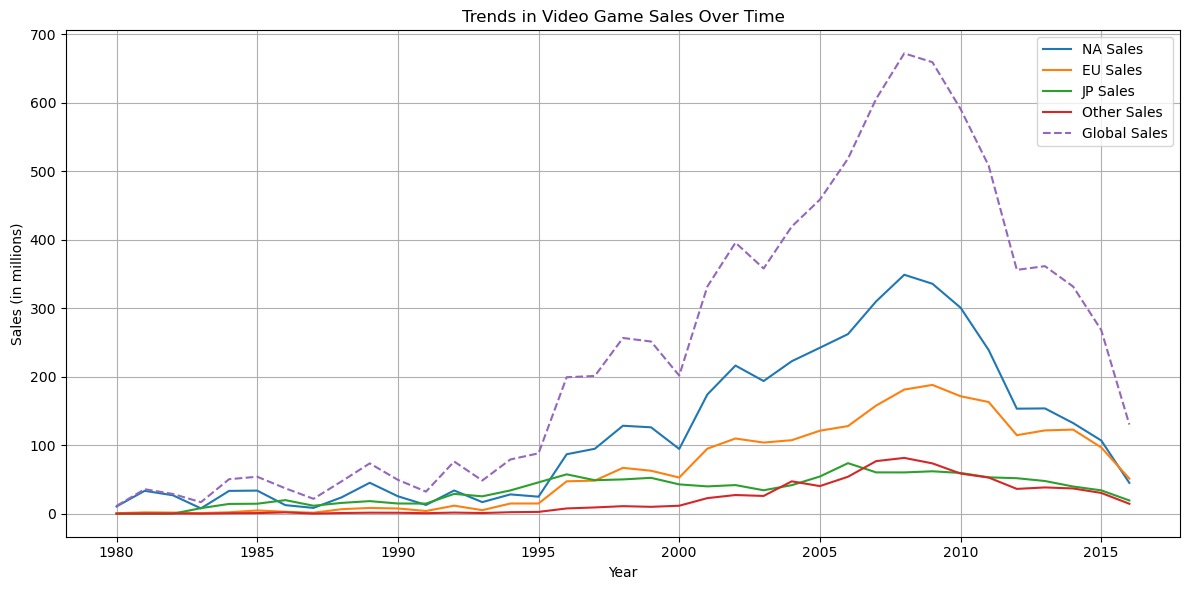

In [40]:
# Drop rows with null values in the 'Year_of_Release' column
vid_df = vid_df.dropna(subset=['Year_of_Release'])

# Convert the 'Year_of_Release' column to integer type (assuming it's currently stored as float)
vid_df['Year_of_Release'] = vid_df['Year_of_Release'].astype(int)

# Group the data by 'Year_of_Release' and sum the sales for each year
sales_over_time = vid_df.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

# Filter the data to include only the years up to 2016
sales_over_time_filtered = sales_over_time[sales_over_time.index <= 2016]

# Plot the trends in sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time_filtered.index, sales_over_time_filtered['NA_Sales'], label='NA Sales')
plt.plot(sales_over_time_filtered.index, sales_over_time_filtered['EU_Sales'], label='EU Sales')
plt.plot(sales_over_time_filtered.index, sales_over_time_filtered['JP_Sales'], label='JP Sales')
plt.plot(sales_over_time_filtered.index, sales_over_time_filtered['Other_Sales'], label='Other Sales')
plt.plot(sales_over_time_filtered.index, sales_over_time_filtered['Global_Sales'], label='Global Sales', linestyle='--')
plt.title('Trends in Video Game Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis of platforms and genres over time

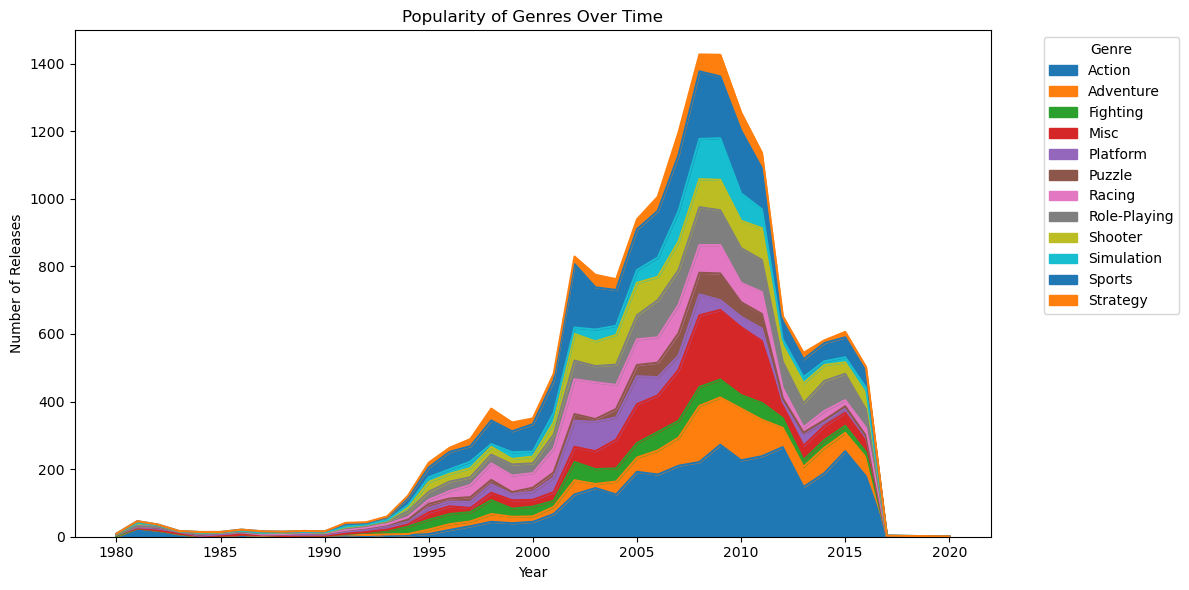

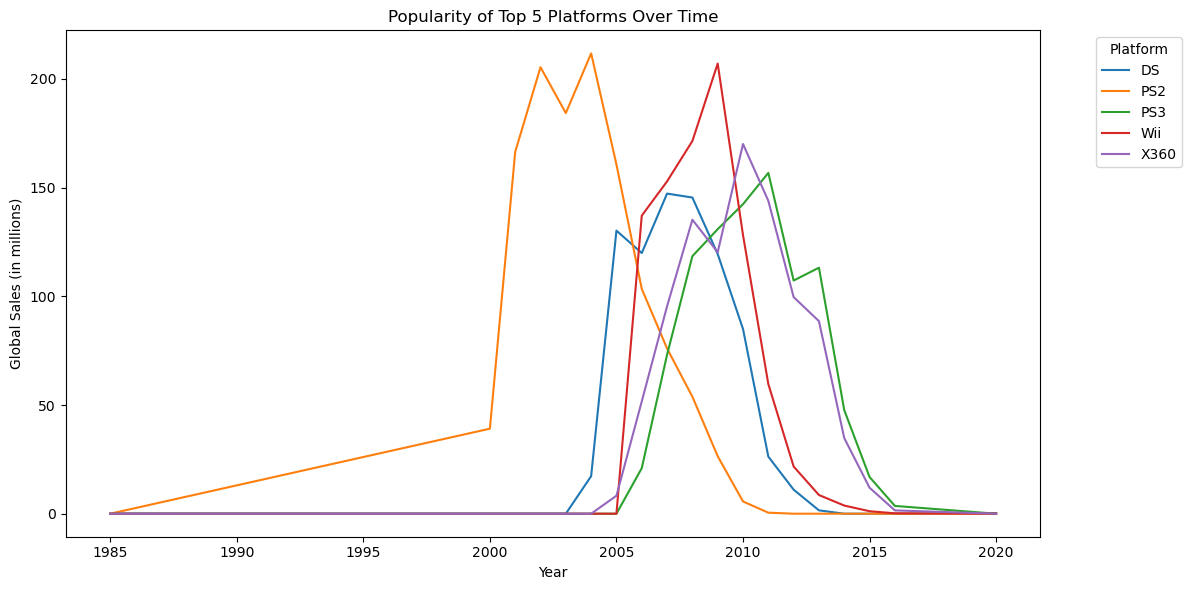

In [45]:
# Popularity of Genres Over Time
genre_popularity_over_time = vid_df.groupby(['Year_of_Release', 'Genre']).size().unstack(fill_value=0)
genre_popularity_over_time.plot(kind='area', figsize=(12, 6))
plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Popularity of Platforms Over Time
# Calculate total sales for each platform across all years
platform_total_sales = vid_df.groupby('Platform')['Global_Sales'].sum()

# Select the top 5 platforms based on total sales
top_platforms = platform_total_sales.nlargest(5).index

# Filter the data to include only the top 5 platforms
df_top_platforms = vid_df[vid_df['Platform'].isin(top_platforms)]

# Group the filtered data by 'Year_of_Release' and 'Platform' and sum the sales for each platform in each year
platform_popularity_over_time = df_top_platforms.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum().unstack(fill_value=0)

# Plot the popularity of platforms over time for the top 5 platforms
platform_popularity_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Popularity of Top 5 Platforms Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2 - Regional Analysis

Text(0.5, 1.0, 'Distribution of Global Sales by Platform (Top 5)')

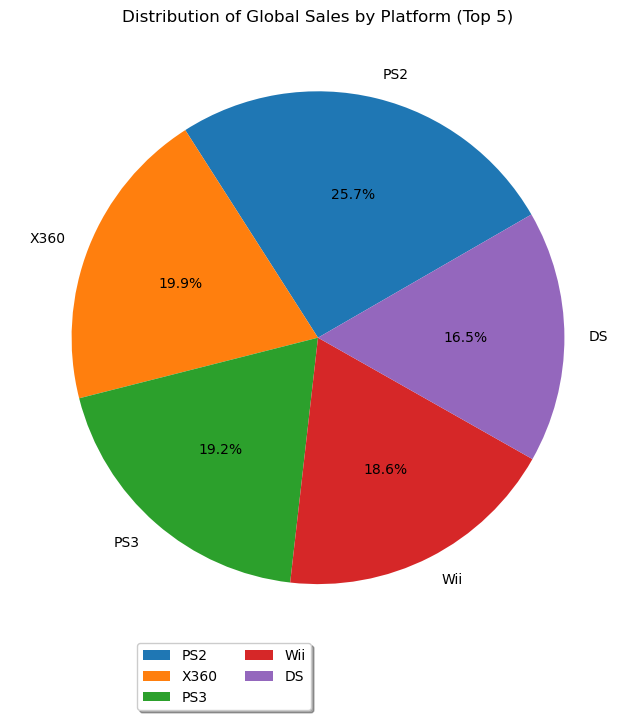

In [27]:

# Group the DataFrame by 'Platform' and sum the 'Global_Sales' for each platform
platform_sales = vid_df.groupby('Platform')['Global_Sales'].sum()

# Get the platforms with the most sales (top 5, for example)
top_platforms = platform_sales.nlargest(5)

# Plot a pie chart for the distribution of sales among the top platforms
plt.figure(figsize=(8, 8))
plt.pie(top_platforms, labels=top_platforms.index, autopct='%1.1f%%', startangle=30)
plt.legend(loc='right', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.title('Distribution of Global Sales by Platform (Top 5)')

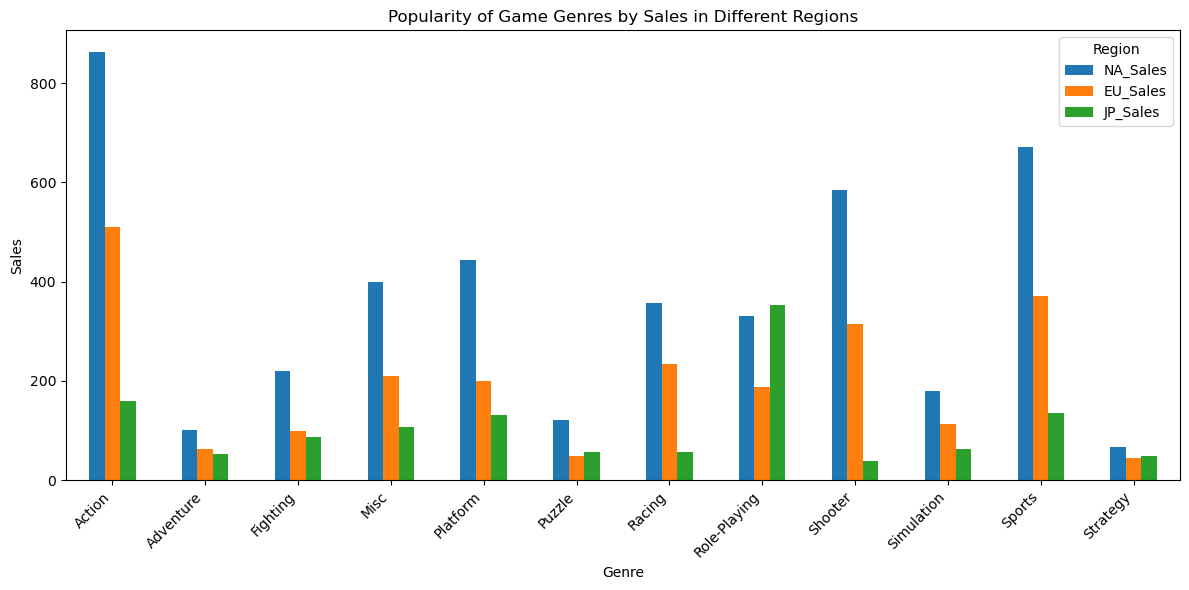

In [52]:
# Group the DataFrame by 'Genre' and sum the sales for each genre
genre_sales = vid_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Plot a bar graph for sales in each region by genre
genre_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Popularity of Game Genres by Sales in Different Regions')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

3 - Correlation Analysis

In [48]:
# Compute the Pearson correlation coefficient between sales in different regions
correlation_sales_regions = vid_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr(method='pearson')

# Print the correlation matrix
print("Correlation between sales in different regions:")
print(correlation_sales_regions)

Correlation between sales in different regions:
             NA_Sales  EU_Sales  JP_Sales  Other_Sales
NA_Sales     1.000000  0.766541  0.451091     0.638438
EU_Sales     0.766541  1.000000  0.435883     0.722679
JP_Sales     0.451091  0.435883  1.000000     0.291568
Other_Sales  0.638438  0.722679  0.291568     1.000000


4 - Market Share Analysis

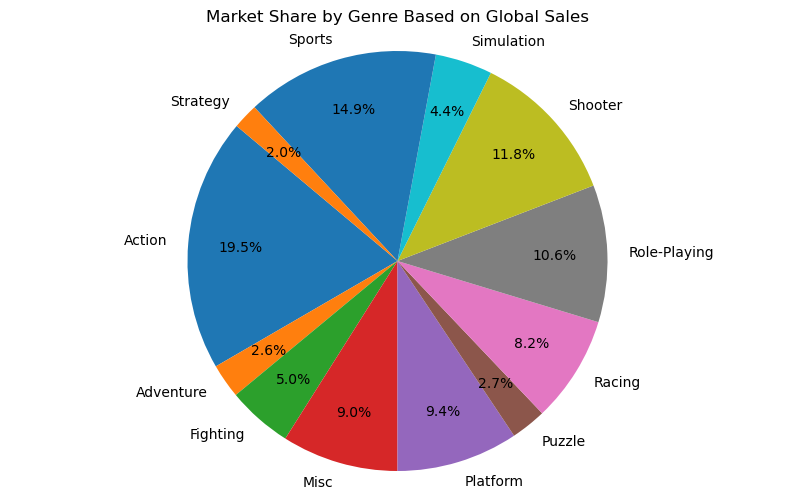

In [53]:
# Calculate total global sales for each genre
genre_global_sales = vid_df.groupby('Genre')['Global_Sales'].sum()

# Calculate the market share for each genre
genre_market_share = (genre_global_sales / genre_global_sales.sum()) * 100

# Optionally, visualize the market shares using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(genre_market_share, labels=genre_market_share.index, autopct='%1.1f%%', startangle=140, pctdistance=0.75)
plt.title('Market Share by Genre Based on Global Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()